In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
df=pd.read_csv('book1.csv')
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [3]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [4]:
df.drop('Hemisphere', axis=1,inplace=True)
df.drop('Patient ID', axis=1,inplace=True)
df.drop('Family History', axis=1,inplace=True)
df.drop('Income', axis=1,inplace=True)
df.drop('Continent', axis=1,inplace=True)
df.drop('Country', axis=1,inplace=True)

In [5]:
df['Sex']=df['Sex'].map({'Male':1,'Female':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   object 
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [6]:
# Step 1: Split the 'Blood Pressure' column into two new columns
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Step 2: Convert the new columns to numeric type
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')
df.drop('Blood Pressure', axis=1,inplace=True)
df.describe()


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,0.697364,259.877325,75.021682,0.652288,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,28.891446,417.677051,3.489672,7.023508,0.358211,135.075659,85.156111
std,21.249509,0.459425,80.863101,20.550948,0.476271,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,6.319181,223.748137,2.282687,1.988473,0.479502,26.349976,14.676565
min,18.000000,0.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,18.002337,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000
25%,35.000000,0.000000,192.000000,57.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,23.422985,225.500000,2.000000,5.000000,0.000000,112.000000,72.000000
50%,54.000000,1.000000,259.000000,75.000000,1.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,28.768999,417.000000,3.000000,7.000000,0.000000,135.000000,85.000000
75%,72.000000,1.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,34.324594,612.000000,5.000000,9.000000,1.000000,158.000000,98.000000
max,90.000000,1.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,39.997211,800.000000,7.000000,10.000000,1.000000,180.000000,110.000000


<Axes: xlabel='Sex', ylabel='count'>

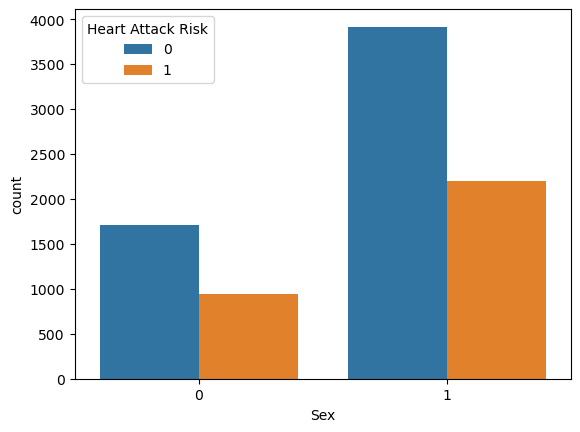

In [7]:
df['Heart Attack Risk'].value_counts()
sns.countplot(x='Sex',hue='Heart Attack Risk',data=df)

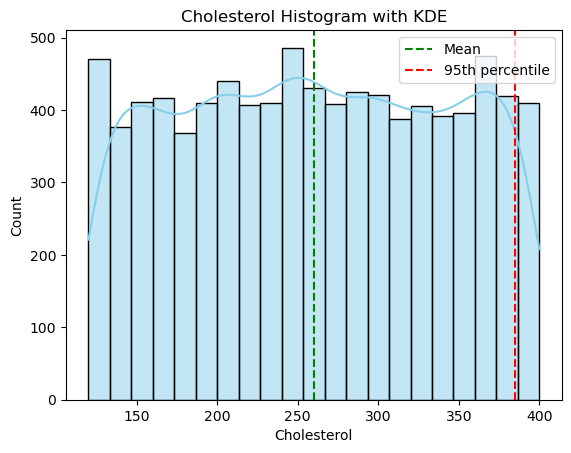

In [8]:

sns.histplot(df['Cholesterol'], kde=True, color='skyblue')
plt.axvline(df['Cholesterol'].mean(), color='green', linestyle='--', label='Mean')
plt.axvline(df['Cholesterol'].quantile(0.95), color='red', linestyle='--', label='95th percentile')
plt.legend()
plt.title("Cholesterol Histogram with KDE")
plt.show()

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

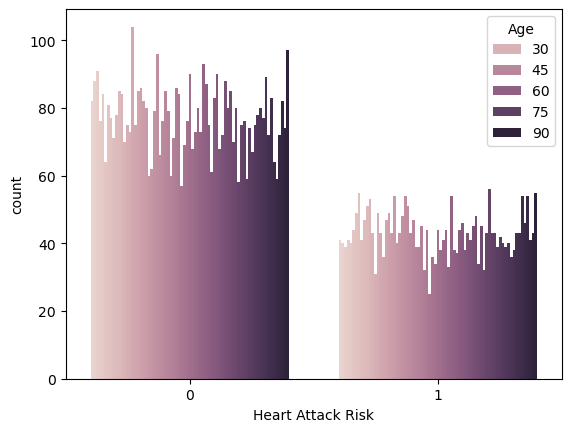

In [9]:
sns.countplot(x='Heart Attack Risk',hue='Age',data=df)

In [10]:
df = pd.get_dummies(df, columns=['Diet'], prefix='Diet')

In [11]:
#df['Diet_Unhealthy']=df['Diet_Unhealthy'].map({'True':1,'False':0})
#df['Diet_Average']=df['Diet_Average'].map({'True':1,'False':0})
#df['Diet_Healthy']=df['Diet_Healthy'].map({'True':1,'False':0})
df['Diet_Healthy'] = df['Diet_Healthy'].astype(int)
df['Diet_Average'] = df['Diet_Average'].astype(int)
df['Diet_Unhealthy'] = df['Diet_Unhealthy'].astype(int)


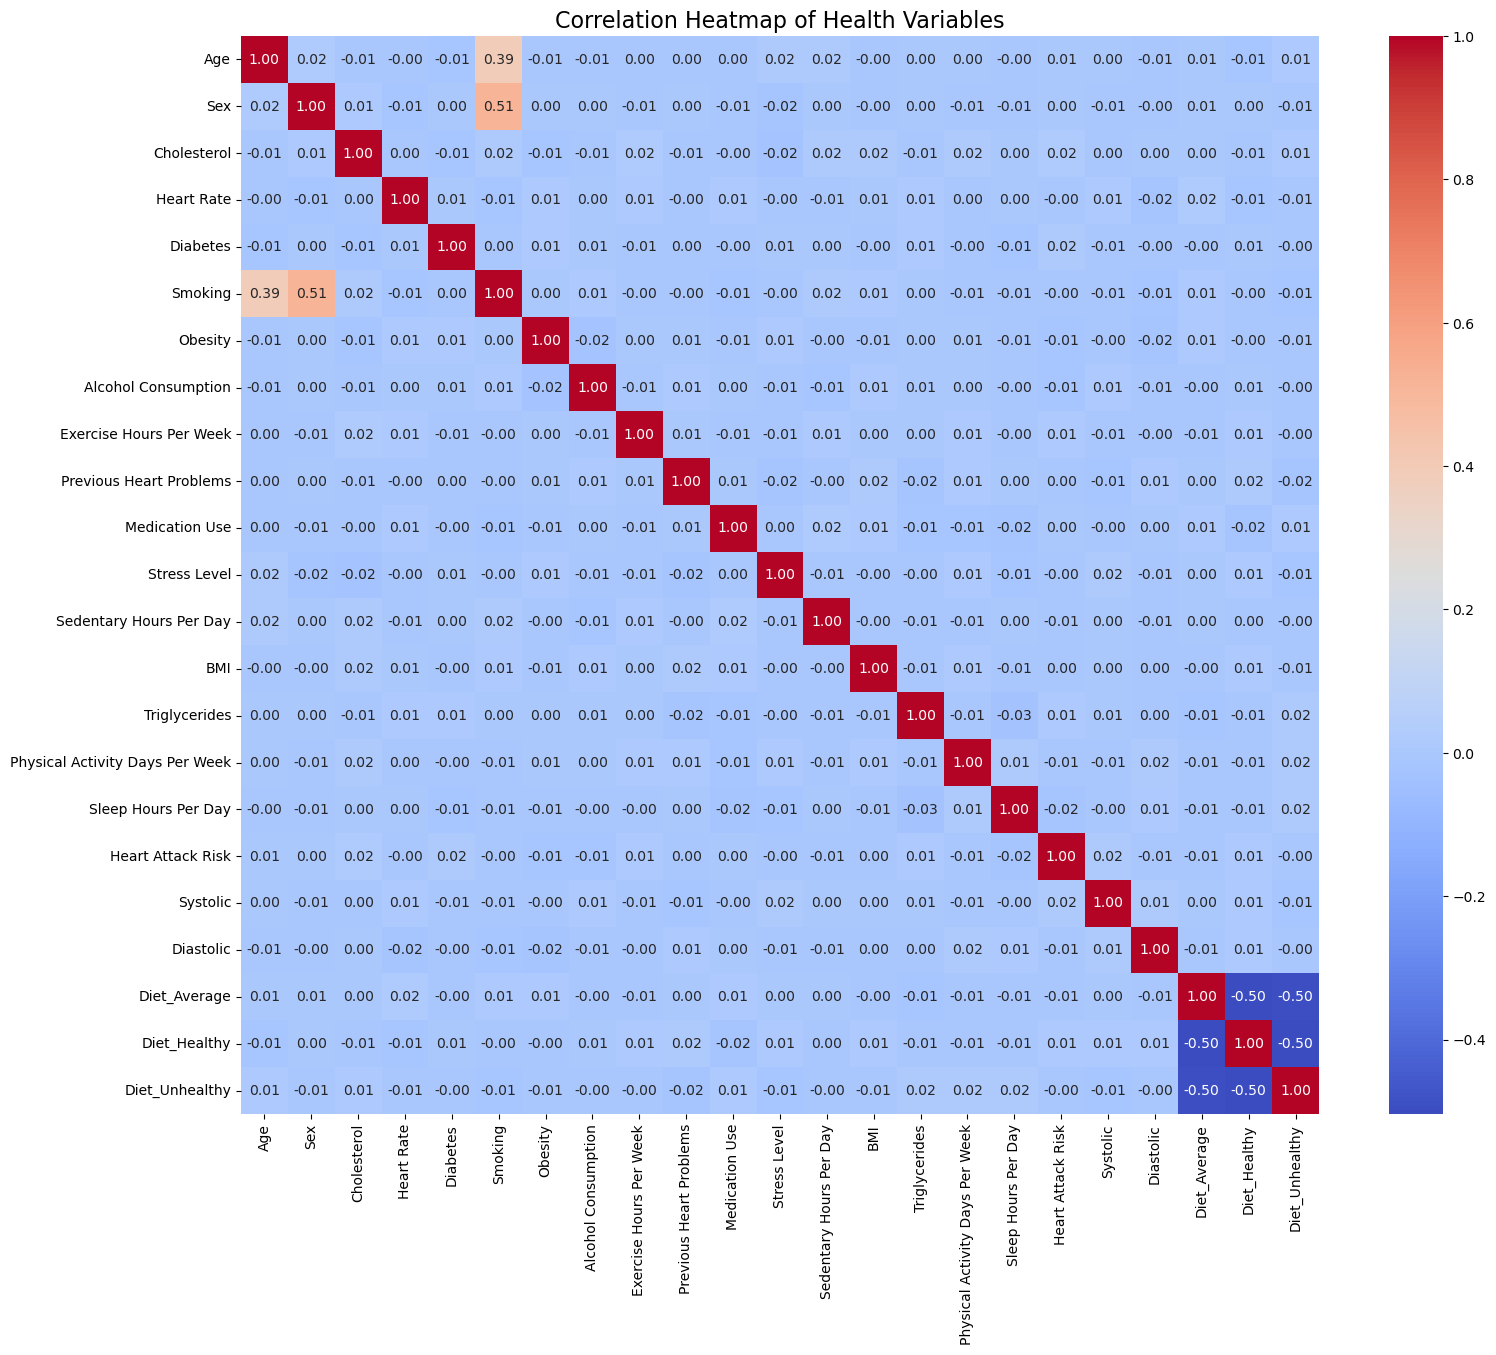

In [12]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt=".2f",square=True)
plt.title("Correlation Heatmap of Health Variables", fontsize=16)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Previous Heart Problems          8763 non-null   int64  
 10  Medication Use                   8763 non-null   int64  
 11  Stress Level                     8763 non-null   int64  
 12  Sedentary Hours Per 

In [14]:
df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,67,1,208,72,0,1,0,0,4.168189,0,...,31.251233,286,0,6,0,158,88,1,0,0
1,21,1,389,98,1,1,1,1,1.813242,1,...,27.194973,235,1,7,0,165,93,0,0,1
2,21,0,324,72,1,0,0,0,2.078353,1,...,28.176571,587,4,4,0,174,99,0,1,0
3,84,1,383,73,1,1,0,1,9.828130,1,...,36.464704,378,3,4,0,163,100,1,0,0
4,66,1,318,93,1,1,1,0,5.804299,1,...,21.809144,231,1,5,0,91,88,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,0,1,7.917342,1,...,19.655895,67,7,7,0,94,76,0,1,0
8759,28,0,120,73,1,0,1,0,16.558426,0,...,23.993866,617,4,9,0,157,102,0,1,0
8760,47,1,250,105,0,1,1,1,3.148438,1,...,35.406146,527,4,4,1,161,75,1,0,0
8761,36,1,178,60,1,1,0,0,3.789950,1,...,27.294020,114,2,8,0,119,67,0,0,1



=== Health Status Distribution ===
Health_Status
Critical    8649
Stable       114
Name: count, dtype: int64

=== Percentage Distribution ===
Health_Status
Critical    98.7%
Stable       1.3%
Name: proportion, dtype: object


C:\Users\ankit\AppData\Local\Temp\ipykernel_26140\3238657447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


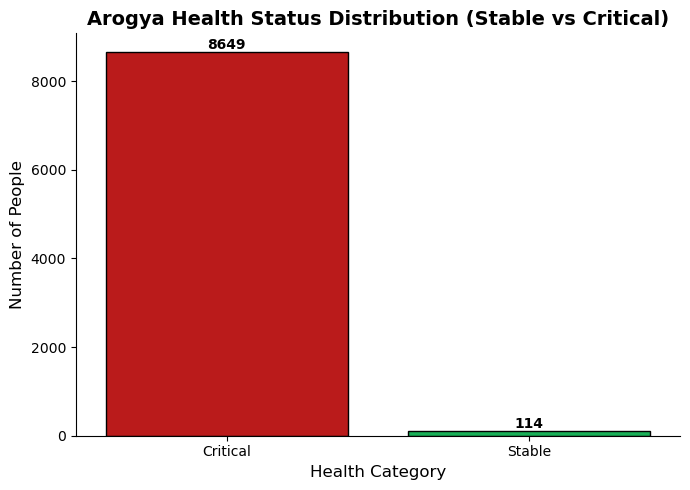

In [15]:
#   Define enhanced function
def critical_label(row):
    """Classifies health status based on risk parameters."""
    if (row['Heart Attack Risk'] == 1 or
        row['Systolic'] >= 180 or row['Diastolic'] >= 120 or
        row['Systolic'] < 90 or row['Diastolic'] < 60 or
        row['Cholesterol'] >= 240 or
        row['Triglycerides'] >= 200 or
        row['BMI'] >= 30 or
        row['Diabetes'] == 1):
        return "Critical"
    else:
        # 🔹 Combine Normal + Moderate together
        return "Stable"

# ✅ Step 2: Apply function to create new column
df['Health_Status'] = df.apply(critical_label, axis=1)

# ✅ Step 3: Distribution check
print("\n=== Health Status Distribution ===")
print(df['Health_Status'].value_counts())
print("\n=== Percentage Distribution ===")
print((df['Health_Status'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

# ✅ Step 4: Visualization
plt.figure(figsize=(7,5))
sns.countplot(
    x='Health_Status',
    data=df,
    palette={'Stable':'#00C853','Critical':'#D50000'},
    edgecolor='black'
)

# Add labels and title
plt.title("Arogya Health Status Distribution (Stable vs Critical)", fontsize=14, fontweight='bold')
plt.xlabel("Health Category", fontsize=12)
plt.ylabel("Number of People", fontsize=12)

# Add value labels on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10, fontweight='bold')

# Improve style
sns.despine()
plt.tight_layout()
plt.show()



In [17]:
# ==========================================
# 🔹 Fixing Imbalanced Data Using SMOTE
# ==========================================

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split your data (if not already done)
X = df.drop(['Health_Status', 'Heart Attack Risk'], axis=1)
y = df['Health_Status'].map({'Critical': 1, 'Stable': 0})  # Binary encoding

# Split train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nBefore SMOTE:")
print(y_train.value_counts())

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("\n✅ After SMOTE (Balanced Data):")
print(pd.Series(y_resampled).value_counts())



Before SMOTE:
Health_Status
1    6919
0      91
Name: count, dtype: int64

✅ After SMOTE (Balanced Data):
Health_Status
1    6919
0    6919
Name: count, dtype: int64


C:\anaconda\anaconda2\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\anaconda\anaconda2\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\anaconda\anaconda2\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\anaconda2\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


=== Balanced Health Status Distribution ===
Health_Status
Critical    6919
Stable      6919
Name: count, dtype: int64

=== Percentage Distribution ===
Health_Status
Critical    50.0%
Stable      50.0%
Name: proportion, dtype: object


C:\Users\ankit\AppData\Local\Temp\ipykernel_26140\3866969460.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


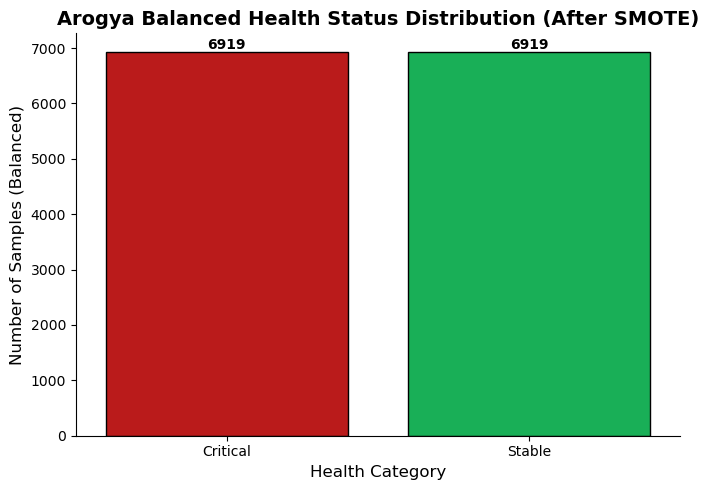

In [18]:
def critical_label(row):
    """Classifies health status based on risk parameters."""
    if (row['Heart Attack Risk'] == 1 or
        row['Systolic'] >= 180 or row['Diastolic'] >= 120 or
        row['Systolic'] < 90 or row['Diastolic'] < 60 or
        row['Cholesterol'] >= 240 or
        row['Triglycerides'] >= 200 or
        row['BMI'] >= 30 or
        row['Diabetes'] == 1):
        return "Critical"
    else:
        return "Stable"

# ------------------------------------------
# Step 2: Create Health_Status Column
# ------------------------------------------
df['Health_Status'] = df.apply(critical_label, axis=1)

# Convert labels to numeric for SMOTE
df['Health_Status_num'] = df['Health_Status'].map({'Critical': 1, 'Stable': 0})

# Separate features and target
X = df.drop(['Health_Status', 'Health_Status_num', 'Heart Attack Risk'], axis=1)
y = df['Health_Status_num']

# ------------------------------------------
# Step 3: Split & Balance Data using SMOTE
# ------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a DataFrame for visualization
balanced_df = pd.DataFrame(y_resampled, columns=['Health_Status_num'])
balanced_df['Health_Status'] = balanced_df['Health_Status_num'].map({1: 'Critical', 0: 'Stable'})

# ------------------------------------------
# Step 4: Check Distribution (After Balancing)
# ------------------------------------------
print("\n=== Balanced Health Status Distribution ===")
print(balanced_df['Health_Status'].value_counts())
print("\n=== Percentage Distribution ===")
print((balanced_df['Health_Status'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

# ------------------------------------------
# Step 5: Visualization
# ------------------------------------------
plt.figure(figsize=(7,5))
sns.countplot(
    x='Health_Status',
    data=balanced_df,
    palette={'Stable': '#00C853', 'Critical': '#D50000'},
    edgecolor='black'
)

plt.title("Arogya Balanced Health Status Distribution (After SMOTE)", fontsize=14, fontweight='bold')
plt.xlabel("Health Category", fontsize=12)
plt.ylabel("Number of Samples (Balanced)", fontsize=12)

# Add value labels on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10, fontweight='bold')

sns.despine()
plt.tight_layout()
plt.show()

In [19]:
print("Training samples after SMOTE:", len(X_resampled))
print("Testing samples:", len(X_test))


Training samples after SMOTE: 13838
Testing samples: 1753



=== Random Forest Classification Report ===
              precision    recall  f1-score   support

      Stable       0.74      0.61      0.67        23
    Critical       0.99      1.00      1.00      1730

    accuracy                           0.99      1753
   macro avg       0.87      0.80      0.83      1753
weighted avg       0.99      0.99      0.99      1753



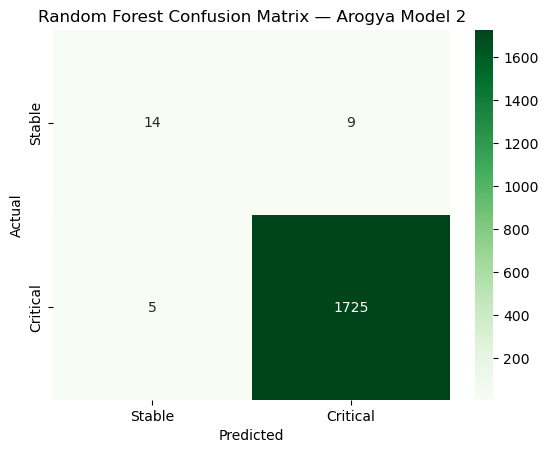


🎯 Random Forest Model Accuracy: 99.20%


In [20]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,     # number of trees
    max_depth=10,         # tree depth
    random_state=42,
    class_weight='balanced'  # gives extra weight to minority classes
)
rf_model.fit(X_resampled, y_resampled)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("\n=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Stable", "Critical"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Stable", "Critical"], yticklabels=["Stable", "Critical"])
plt.title("Random Forest Confusion Matrix — Arogya Model 2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Random Forest Model Accuracy: {acc*100:.2f}%")



C:\Users\ankit\AppData\Local\Temp\ipykernel_15764\3785808011.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


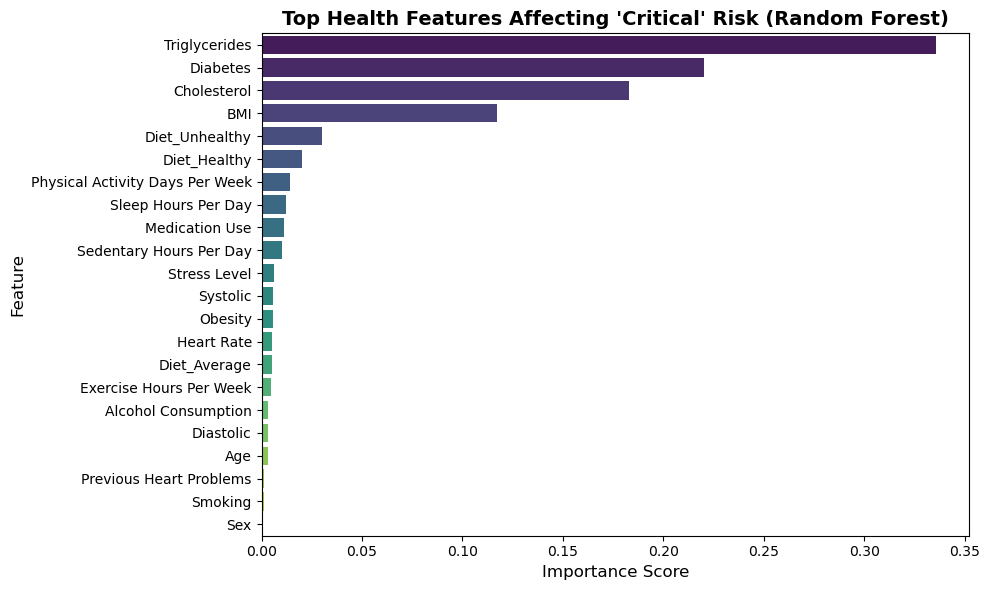

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Top Health Features Affecting 'Critical' Risk (Random Forest)", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


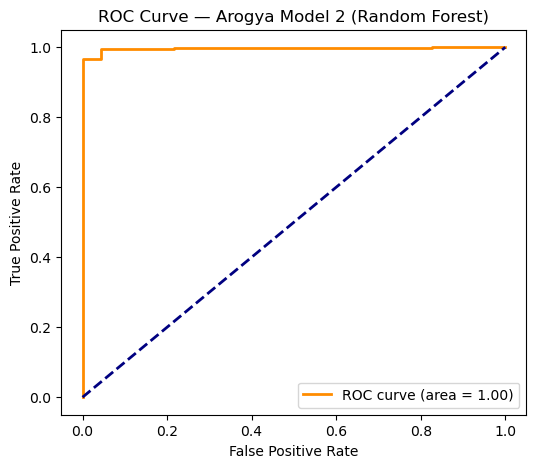

In [21]:
from sklearn.metrics import roc_curve, auc

y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Arogya Model 2 (Random Forest)')
plt.legend(loc="lower right")
plt.show()


C:\anaconda\anaconda2\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

      Stable       0.40      0.91      0.56        23
    Critical       1.00      0.98      0.99      1730

    accuracy                           0.98      1753
   macro avg       0.70      0.95      0.78      1753
weighted avg       0.99      0.98      0.98      1753



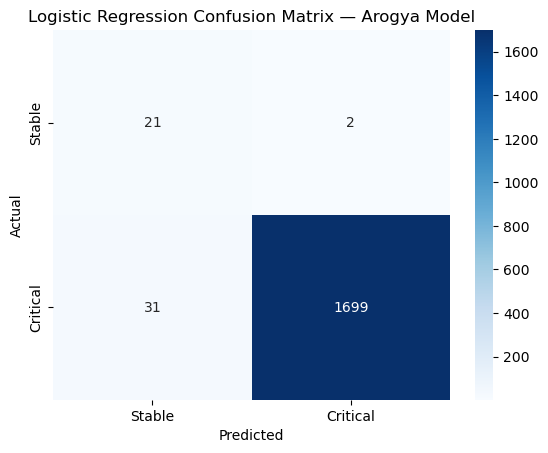


🎯 Logistic Regression Model Accuracy: 98.12%


In [25]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr_model = LogisticRegression(
    class_weight='balanced',  # handle imbalance
    max_iter=1000,            # ensure convergence
    random_state=42
)
lr_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("\n=== Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred_lr, target_names=["Stable", "Critical"]))

# Confusion Matrix for test how your model are good predication or not
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Stable", "Critical"], yticklabels=["Stable", "Critical"])
plt.title("Logistic Regression Confusion Matrix — Arogya Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy check karane ke liy 
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"\n Logistic Regression Model Accuracy: {acc_lr*100:.2f}%")


C:\anaconda\anaconda2\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:02:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost Classification Report ===
              precision    recall  f1-score   support

      Stable       0.73      0.70      0.71        23
    Critical       1.00      1.00      1.00      1730

    accuracy                           0.99      1753
   macro avg       0.86      0.85      0.85      1753
weighted avg       0.99      0.99      0.99      1753



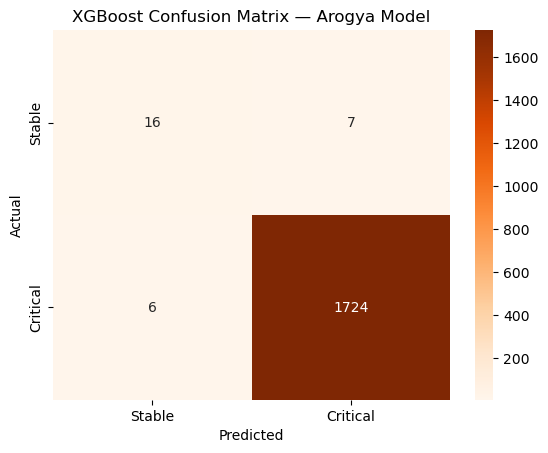


🎯 XGBoost Model Accuracy: 99.26%


In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train XGBoost model
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    scale_pos_weight=1,  # adjust if imbalance is high
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("\n=== XGBoost Classification Report ===")
print(classification_report(y_test, y_pred_xgb, target_names=["Stable", "Critical"]))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["Stable", "Critical"], yticklabels=["Stable", "Critical"])
plt.title("XGBoost Confusion Matrix — Arogya Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\n🎯 XGBoost Model Accuracy: {acc_xgb*100:.2f}%")


C:\anaconda\anaconda2\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:02:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\anaconda\anaconda2\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Ensemble Model Classification Report ===
              precision    recall  f1-score   support

      Stable       0.75      0.78      0.77        23
    Critical       1.00      1.00      1.00      1730

    accuracy                           0.99      1753
   macro avg       0.87      0.89      0.88      1753
weighted avg       0.99      0.99      0.99      1753



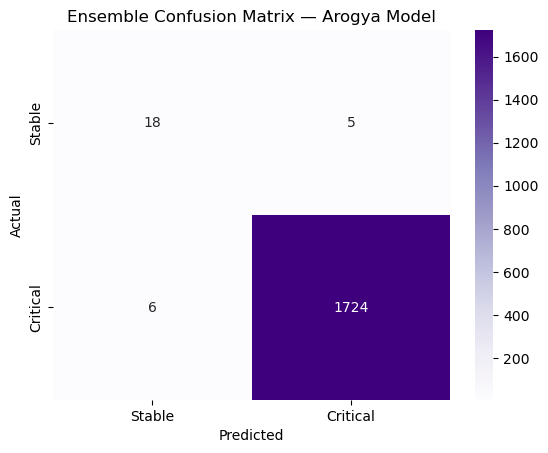


🎯 Ensemble Model Accuracy: 99.37%


In [27]:
from sklearn.ensemble import VotingClassifier


# Define individual models
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1,
                          scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss', random_state=42)
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Create ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lr', lr_model)
    ],
    voting='soft'  # soft voting uses predicted probabilities
)

# Train ensemble model
ensemble_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluation
print("\n=== Ensemble Model Classification Report ===")
print(classification_report(y_test, y_pred_ensemble, target_names=["Stable", "Critical"]))

# Confusion Matrix
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Stable", "Critical"], yticklabels=["Stable", "Critical"])
plt.title("Ensemble Confusion Matrix — Arogya Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"\n🎯 Ensemble Model Accuracy: {acc_ensemble*100:.2f}%")


In [28]:
import joblib

# Save the model
joblib.dump(ensemble_model, 'arogya_link_ensemble_model2.pkl')

# Load later when needed
# loaded_model = joblib.load('arogya_ensemble_model.pkl')


['arogya_link_ensemble_model2.pkl']

PermutationExplainer explainer: 1754it [2:07:22,  4.36s/it]                              
C:\Users\ankit\AppData\Local\Temp\ipykernel_26140\1635878601.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)
C:\anaconda\anaconda2\Lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\anaconda\anaconda2\Lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour 

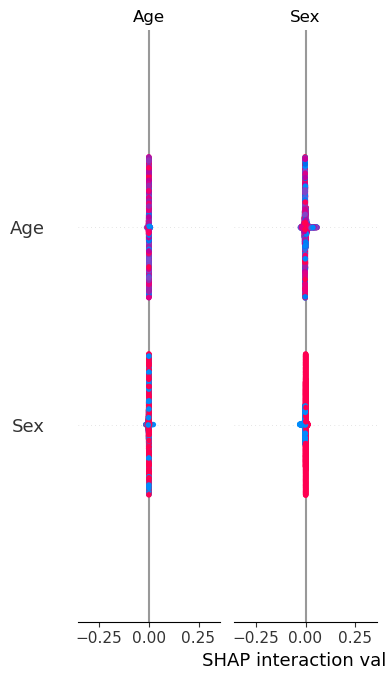

In [29]:
import shap

explainer = shap.Explainer(ensemble_model.predict_proba, X_test)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


In [30]:

# Step 1️⃣: Get probabilities for "Critical" class
y_probs = ensemble_model.predict_proba(X_test)[:, 1]

# Step 2️⃣: Calculate precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Step 3️⃣: Compute F1 score for each threshold to find best balance
f1_scores = 2 * (precision * recall) / (precision + recall)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print("🔥 Best Threshold (F1 optimized):", round(best_threshold, 3))
print("Precision:", round(precision[best_index], 3))
print("Recall:", round(recall[best_index], 3))

# Step 4️⃣: Plot Precision-Recall vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--')
plt.plot(thresholds, recall[:-1], label='Recall', linestyle='-')
plt.axvline(best_threshold, color='red', linestyle=':', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision–Recall vs Threshold (Optimized)')
plt.grid(True)
plt.show()

# Step 5️⃣: Apply custom threshold to make final predictions
y_pred_custom = (y_probs >= best_threshold).astype(int)

# Step 6️⃣: Evaluate model with the optimized threshold
print("\n📊 Model Evaluation with Optimized Threshold")
print("Accuracy:", round(accuracy_score(y_test, y_pred_custom), 3))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))


NameError: name 'precision_recall_curve' is not defined